In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
# Define image size and batch size
img_size = (224, 224)
batch_size = 16

# Create data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,           
    width_shift_range=0.3,      
    height_shift_range=0.3,     
    shear_range=0.2,            
    zoom_range=0.2,             
    horizontal_flip=True,
    vertical_flip=True,          
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    "Sugarcane_Dataset/training",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
   
    shuffle=True
)


validation_generator = train_datagen.flow_from_directory(
    "Sugarcane_Dataset/training",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)




Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [14]:
CLASS_NAMES = train_generator.class_indices.keys()
CLASS_NAMES

dict_keys(['Bacterial_Blight', 'Healthy_Leaf', 'Red_Rot'])

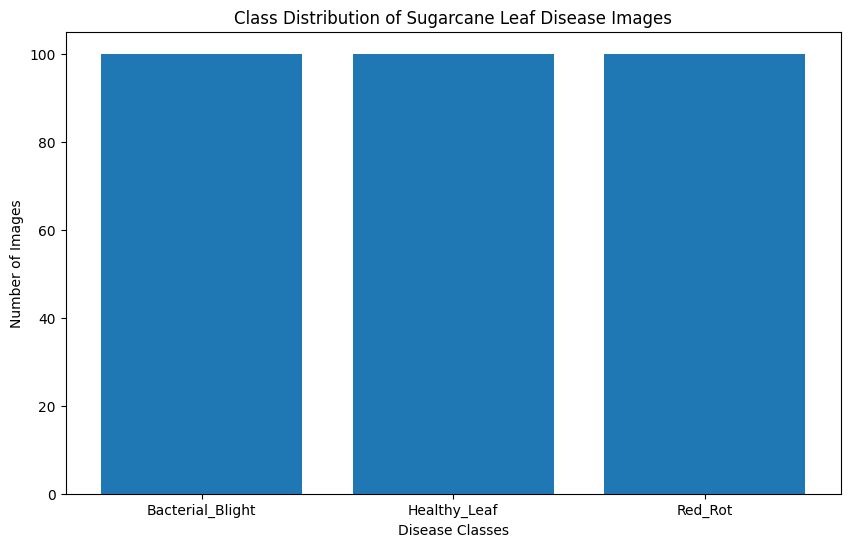

In [1]:

# Define the path to your dataset
dataset_path = "Sugarcane_Dataset/training"
# List the subdirectories (classes) within the dataset
classes = os.listdir(dataset_path)
# Initialize a dictionary to store the count of images in each class
class_counts = {}

# Iterate through each class folder and count the number of images
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    num_images = len(os.listdir(class_path))
    class_counts[class_name] = num_images

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Disease Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Sugarcane Leaf Disease Images')
plt.show()

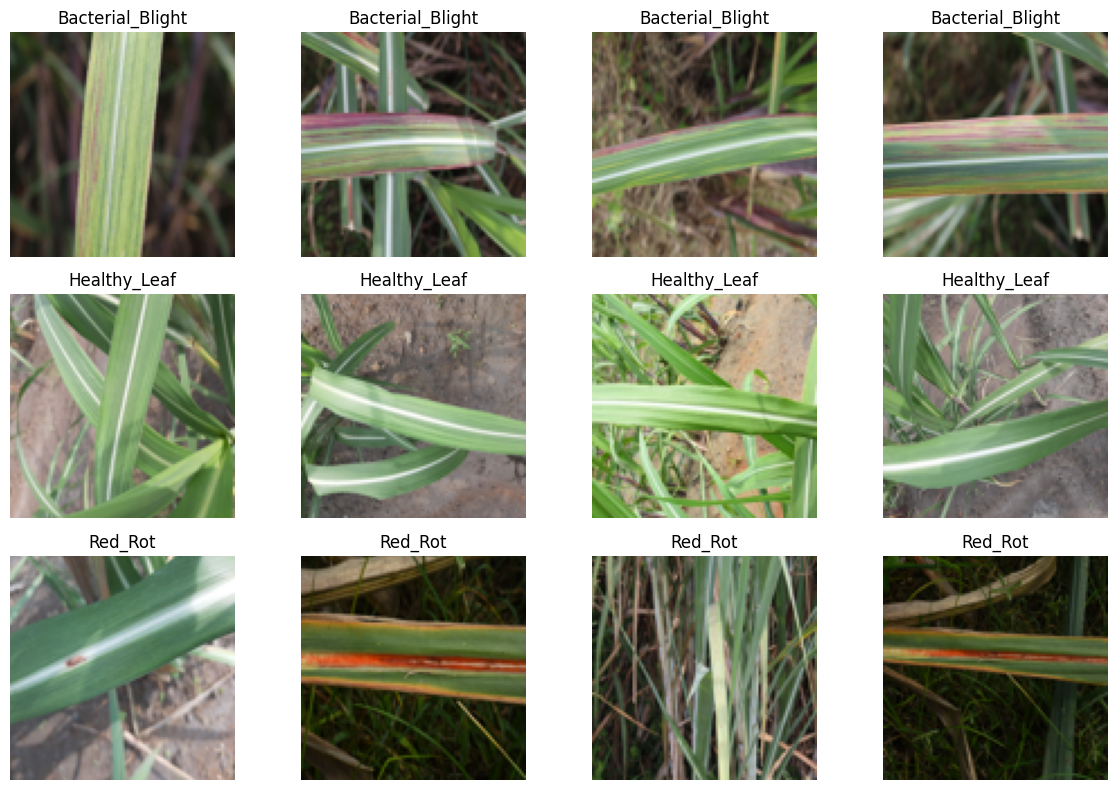

In [3]:
# Define the number of images to display per class
num_images_per_class = 4

# Create a figure with subplots
plt.figure(figsize=(12, 8))

# Iterate through each class and display a grid of thumbnails
for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    image_files = os.listdir(class_path)[:num_images_per_class]

    for j, image_file in enumerate(image_files):
        image_path = os.path.join(class_path, image_file)
        image = imread(image_path)
        
        # Resize the image for display 
        image = Image.fromarray(image)
        image = image.resize((100, 100))

        plt.subplot(len(classes), num_images_per_class, i*num_images_per_class + j + 1)
        plt.imshow(image)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()


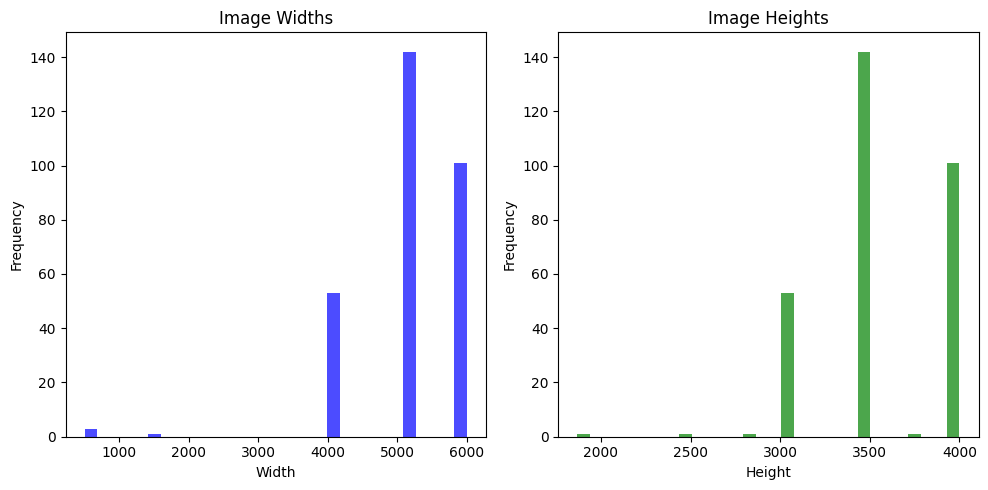

In [4]:
# Initialize lists to store image widths and heights
widths = []
heights = []

# Iterate through each class and collect image sizes
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    image_files = os.listdir(class_path)

    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        image = Image.open(image_path)
        width, height = image.size
        widths.append(width)
        heights.append(height)

# Create histograms for image widths and heights
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='blue', alpha=0.7)
plt.title('Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='green', alpha=0.7)
plt.title('Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [202]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout
from tensorflow.keras.regularizers import l2

DenseNet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the initial layers
for layer in DenseNet121.layers:  
    layer.trainable = False
num_classes=3
# adding additional layers
DenseNet121_x = DenseNet121.output
DenseNet121_x = GlobalAveragePooling2D()(DenseNet121_x)
DenseNet121_x = Dense(200,activation='relu')(DenseNet121_x)
output = Dense(num_classes, activation='softmax')(DenseNet121_x) 

DenseNet121_model = Model(inputs=DenseNet121.input, outputs=output)


# Compile the model
DenseNet121_model.compile(optimizer=optimizers.Adam(learning_rate=0.0005
                                                ), loss='categorical_crossentropy', metrics=['accuracy'])
DenseNet121_model.summary()




Model: "model_41"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_49 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_36 (ZeroPadding  (None, 230, 230, 3)  0          ['input_49[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_36[0][0]']      
                                )                                                          

 conv2_block4_0_relu (Activatio  (None, 56, 56, 160)  0          ['conv2_block4_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 56, 56, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_blo

 conv3_block10_concat (Concaten  (None, 28, 28, 448)  0          ['conv3_block9_concat[0][0]',    
 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 28, 28, 128)  57344       ['conv3_block11_0_relu[0][0]']   
          

                                                                                                  
 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block7_0_relu (Activatio  (None, 14, 14, 448)  0          ['conv4_block7_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 14, 14, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)

 ate)                                                             'conv4_block15_2_conv[0][0]']   
                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block20_1_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 14, 14, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
                                                                                                  
 pool4_rel

 ization)                                                                                         
                                                                                                  
 conv5_block4_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 7, 7, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_blo

 conv5_block8_concat (Concatena  (None, 7, 7, 768)   0           ['conv5_block7_concat[0][0]',    
 te)                                                              'conv5_block8_2_conv[0][0]']    
                                                                                                  
 conv5_block9_0_bn (BatchNormal  (None, 7, 7, 768)   3072        ['conv5_block8_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 7, 7, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 7, 7, 128)    98304       ['conv5_block9_0_relu[0][0]']    
          

 on)                                                                                              
                                                                                                  
 conv5_block13_1_conv (Conv2D)  (None, 7, 7, 128)    114688      ['conv5_block13_0_relu[0][0]']   
                                                                                                  
 conv5_block13_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_blo

                                                                                                  
Total params: 7,243,107
Trainable params: 205,603
Non-trainable params: 7,037,504
__________________________________________________________________________________________________


In [237]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='auto')

In [204]:
DenseNet121_history = DenseNet121_model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    batch_size=16,
    callbacks=[early_stopping]  
)


Epoch 1/25
15/15 [==============================] - 120s 7s/step - loss: 1.0012 - accuracy: 0.5667 - val_loss: 0.8728 - val_accuracy: 0.5833
Epoch 2/25
15/15 [==============================] - 106s 7s/step - loss: 0.7555 - accuracy: 0.6958 - val_loss: 0.6535 - val_accuracy: 0.6500
Epoch 3/25
15/15 [==============================] - 106s 7s/step - loss: 0.5983 - accuracy: 0.7625 - val_loss: 0.5728 - val_accuracy: 0.7333
Epoch 4/25
15/15 [==============================] - 106s 7s/step - loss: 0.5419 - accuracy: 0.7625 - val_loss: 0.4504 - val_accuracy: 0.8500
Epoch 5/25
15/15 [==============================] - 107s 7s/step - loss: 0.4976 - accuracy: 0.8042 - val_loss: 0.4683 - val_accuracy: 0.7833
Epoch 6/25
15/15 [==============================] - 106s 7s/step - loss: 0.4571 - accuracy: 0.8042 - val_loss: 0.3150 - val_accuracy: 0.9167
Epoch 7/25
15/15 [==============================] - 106s 7s/step - loss: 0.4198 - accuracy: 0.8292 - val_loss: 0.4660 - val_accuracy: 0.8333
Epoch 8/25
15

In [205]:
DenseNet_evaluate=DenseNet121_model.evaluate(validation_generator)
DenseNet_evaluate

4/4 [==============================] - 21s 5s/step - loss: 0.2323 - accuracy: 0.9167


[0.23225773870944977, 0.9166666865348816]

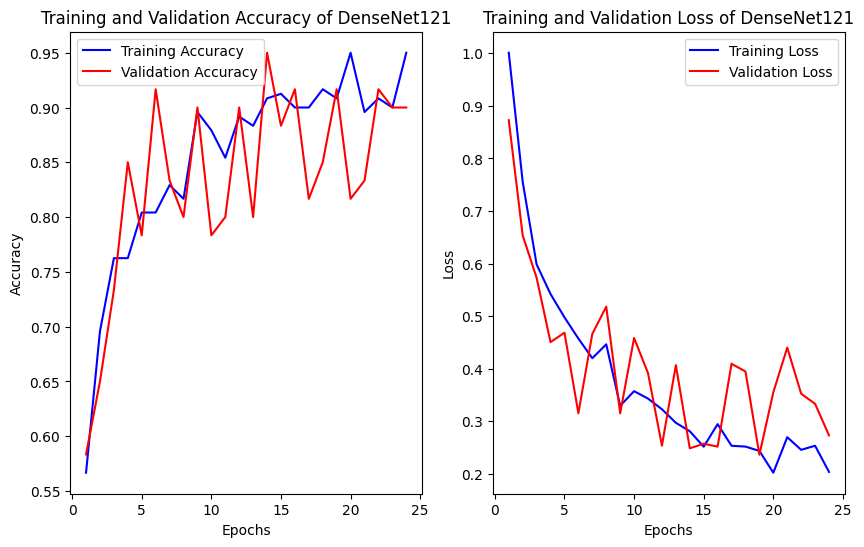

In [206]:
import matplotlib.pyplot as plt
# Get training and validation accuracy values
train_accuracy = DenseNet121_history.history['accuracy']
val_accuracy = DenseNet121_history.history['val_accuracy']
# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)
# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of DenseNet121')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.show()


# Get training and validation loss values
train_loss = DenseNet121_history.history['loss']
val_loss = DenseNet121_history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss of DenseNet121')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



4/4 [==============================] - 23s 5s/step


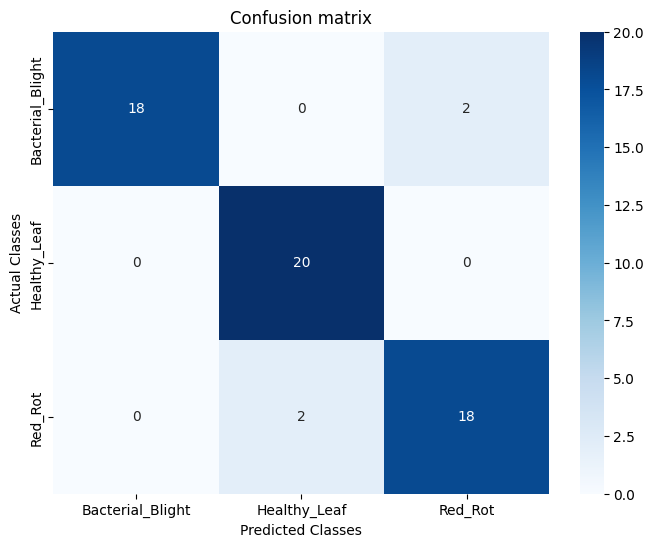


Classification Report of DenseNet121:
                  precision    recall  f1-score   support

Bacterial_Blight       1.00      0.90      0.95        20
    Healthy_Leaf       0.91      1.00      0.95        20
         Red_Rot       0.90      0.90      0.90        20

        accuracy                           0.93        60
       macro avg       0.94      0.93      0.93        60
    weighted avg       0.94      0.93      0.93        60



In [207]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
prediction=DenseNet121_model.predict(validation_generator)
predicted_classes=np.argmax(prediction,axis=1)
true_classes=validation_generator.classes
class_labels=list(validation_generator.class_indices.keys())
conf_matrix=confusion_matrix(true_classes,predicted_classes)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=class_labels,yticklabels=class_labels)
plt.title("Confusion matrix")
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()
# print(conf_matrix)
class_report=classification_report(true_classes,predicted_classes,target_names=class_labels,zero_division=1)
print("\nClassification Report of DenseNet121:")
print(class_report)

In [208]:
model_version="DenseNet121"
DenseNet121_model.save(f"./base_models/{model_version}")

INFO:tensorflow:Assets written to: ./base_models/DenseNet121\assets


INFO:tensorflow:Assets written to: ./base_models/DenseNet121\assets


In [209]:
DenseNet121_model.save("DenseNet121.h5")

# Trained MobileNetV2 Model

In [135]:
from tensorflow.keras.applications import MobileNetV2
MobileNet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the initial layers
for layer in MobileNet.layers:  
    layer.trainable = False
num_classes=3
# adding additional layers
MobileNet_x = MobileNet.output
MobileNet_x = GlobalAveragePooling2D()(MobileNet_x)
MobileNet_x = Dense(128,activation='relu')(MobileNet_x)

output = Dense(num_classes, activation='softmax')(MobileNet_x) 

MobileNet_model = Model(inputs=MobileNet.input, outputs=output)


# Compile the model
MobileNet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
MobileNet_model.summary()




Model: "model_22"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_30 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_30[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                          

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [136]:
MobileNet_model_history = MobileNet_model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    batch_size=16,
    callbacks=[early_stopping]  
)

Epoch 1/25
15/15 [==============================] - 70s 5s/step - loss: 1.2225 - accuracy: 0.3500 - val_loss: 1.2056 - val_accuracy: 0.3167
Epoch 2/25
15/15 [==============================] - 65s 4s/step - loss: 1.0544 - accuracy: 0.4250 - val_loss: 1.0193 - val_accuracy: 0.5333
Epoch 3/25
15/15 [==============================] - 65s 4s/step - loss: 0.9236 - accuracy: 0.5708 - val_loss: 0.9110 - val_accuracy: 0.5667
Epoch 4/25
15/15 [==============================] - 65s 4s/step - loss: 0.8442 - accuracy: 0.6250 - val_loss: 0.8129 - val_accuracy: 0.7000
Epoch 5/25
15/15 [==============================] - 65s 4s/step - loss: 0.7777 - accuracy: 0.7125 - val_loss: 0.8352 - val_accuracy: 0.6167
Epoch 6/25
15/15 [==============================] - 64s 4s/step - loss: 0.7303 - accuracy: 0.7208 - val_loss: 0.6264 - val_accuracy: 0.8333
Epoch 7/25
15/15 [==============================] - 64s 4s/step - loss: 0.6851 - accuracy: 0.7292 - val_loss: 0.8187 - val_accuracy: 0.6500
Epoch 8/25
15/15 [==

In [137]:
MobileNet_evaluate=MobileNet_model.evaluate(validation_generator)
MobileNet_evaluate

4/4 [==============================] - 11s 3s/step - loss: 0.4353 - accuracy: 0.8000


[0.43533527851104736, 0.800000011920929]

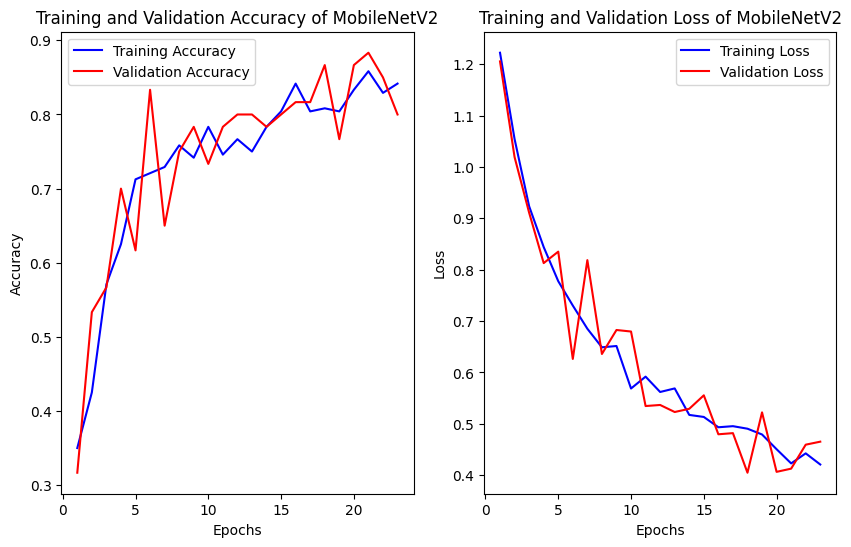

In [139]:
import matplotlib.pyplot as plt
# Get training and validation accuracy values
train_accuracy = MobileNet_model_history.history['accuracy']
val_accuracy = MobileNet_model_history.history['val_accuracy']
# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)
# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of MobileNetV2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.show()


# Get training and validation loss values
train_loss = MobileNet_model_history.history['loss']
val_loss = MobileNet_model_history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss of MobileNetV2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



4/4 [==============================] - 12s 3s/step


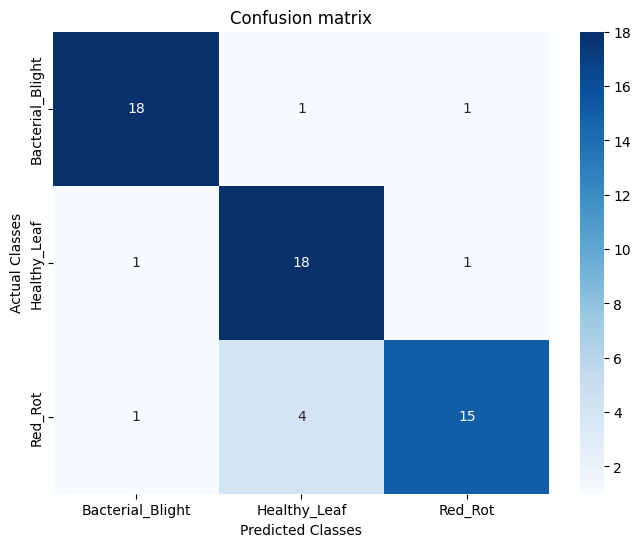


Classification Report of DenseNet201:
                  precision    recall  f1-score   support

Bacterial_Blight       0.90      0.90      0.90        20
    Healthy_Leaf       0.78      0.90      0.84        20
         Red_Rot       0.88      0.75      0.81        20

        accuracy                           0.85        60
       macro avg       0.85      0.85      0.85        60
    weighted avg       0.85      0.85      0.85        60



In [138]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
prediction=MobileNet_model.predict(validation_generator)
predicted_classes=np.argmax(prediction,axis=1)
true_classes=validation_generator.classes
class_labels=list(validation_generator.class_indices.keys())
conf_matrix=confusion_matrix(true_classes,predicted_classes)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=class_labels,yticklabels=class_labels)
plt.title("Confusion matrix")
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()
# print(conf_matrix)
class_report=classification_report(true_classes,predicted_classes,target_names=class_labels,zero_division=1)
print("\nClassification Report of MobileNetV2:")
print(class_report)

In [140]:
model_version="MobileNetV2"
MobileNet_model.save(f"./base_models/{model_version}")

INFO:tensorflow:Assets written to: ./base_models/MobileNetV2\assets


INFO:tensorflow:Assets written to: ./base_models/MobileNetV2\assets


In [142]:
MobileNet_model.save("MobileNetV2.h5")

# Trained InceptionV3

In [229]:
from tensorflow.keras.applications import InceptionV3
Inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the initial layers
for layer in Inception.layers:  
    layer.trainable = False
num_classes=3
# adding additional layers
Inception_x = Inception.output
Inception_x = GlobalAveragePooling2D()(Inception_x)
Inception_x = Dense(128,activation='relu')(Inception_x)
# Inception_x=Dropout(0.4)(Inception_x)
output = Dense(num_classes, activation='softmax')(Inception_x) 

Inception_model = Model(inputs=Inception.input, outputs=output)


# Compile the model
Inception_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
Inception_model.summary()




Model: "model_48"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_56 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1422 (Conv2D)           (None, 111, 111, 32  864         ['input_56[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1422 (Batc  (None, 111, 111, 32  96         ['conv2d_1422[0][0]']            
 hNormalization)                )                                                          

                                                                                                  
 conv2d_1429 (Conv2D)           (None, 25, 25, 64)   76800       ['activation_1980[0][0]']        
                                                                                                  
 conv2d_1432 (Conv2D)           (None, 25, 25, 96)   82944       ['activation_1983[0][0]']        
                                                                                                  
 conv2d_1433 (Conv2D)           (None, 25, 25, 32)   6144        ['average_pooling2d_135[0][0]']  
                                                                                                  
 batch_normalization_1427 (Batc  (None, 25, 25, 64)  192         ['conv2d_1427[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1986 (Activation)   (None, 25, 25, 64)   0           ['batch_normalization_1434[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1988 (Activation)   (None, 25, 25, 64)   0           ['batch_normalization_1436[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1991 (Activation)   (None, 25, 25, 96)   0           ['batch_normalization_1439[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1992 (Activation)   (None, 25, 25, 64)   0           ['batch_normalization_1440[0][0]'
          

 batch_normalization_1449 (Batc  (None, 25, 25, 64)  192         ['conv2d_1449[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2001 (Activation)   (None, 25, 25, 64)   0           ['batch_normalization_1449[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1450 (Conv2D)           (None, 25, 25, 96)   55296       ['activation_2001[0][0]']        
                                                                                                  
 batch_normalization_1450 (Batc  (None, 25, 25, 96)  288         ['conv2d_1450[0][0]']            
 hNormalization)                                                                                  
          

                                                                 ]                                
                                                                                                  
 average_pooling2d_138 (Average  (None, 12, 12, 768)  0          ['mixed3[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1452 (Conv2D)           (None, 12, 12, 192)  147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_1455 (Conv2D)           (None, 12, 12, 192)  172032      ['activation_2006[0][0]']        
                                                                                                  
 conv2d_1460 (Conv2D)           (None, 12, 12, 192)  172032      ['activation_2011[0][0]']        
          

                                                                                                  
 activation_2016 (Activation)   (None, 12, 12, 160)  0           ['batch_normalization_1464[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2021 (Activation)   (None, 12, 12, 160)  0           ['batch_normalization_1469[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_139 (Average  (None, 12, 12, 768)  0          ['mixed4[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_14

 batch_normalization_1474 (Batc  (None, 12, 12, 160)  480        ['conv2d_1474[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1479 (Batc  (None, 12, 12, 160)  480        ['conv2d_1479[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2026 (Activation)   (None, 12, 12, 160)  0           ['batch_normalization_1474[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2031 (Activation)   (None, 12, 12, 160)  0           ['batch_normalization_1479[0][0]'
          

                                                                                                  
 conv2d_1484 (Conv2D)           (None, 12, 12, 192)  258048      ['activation_2035[0][0]']        
                                                                                                  
 conv2d_1489 (Conv2D)           (None, 12, 12, 192)  258048      ['activation_2040[0][0]']        
                                                                                                  
 batch_normalization_1484 (Batc  (None, 12, 12, 192)  576        ['conv2d_1484[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1489 (Batc  (None, 12, 12, 192)  576        ['conv2d_1489[0][0]']            
 hNormalization)                                                                                  
          

 activation_2044 (Activation)   (None, 12, 12, 192)  0           ['batch_normalization_1492[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2048 (Activation)   (None, 12, 12, 192)  0           ['batch_normalization_1496[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1493 (Conv2D)           (None, 5, 5, 320)    552960      ['activation_2044[0][0]']        
                                                                                                  
 conv2d_1497 (Conv2D)           (None, 5, 5, 192)    331776      ['activation_2048[0][0]']        
                                                                                                  
 batch_nor

 activation_2052 (Activation)   (None, 5, 5, 384)    0           ['batch_normalization_1500[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2053 (Activation)   (None, 5, 5, 384)    0           ['batch_normalization_1501[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2056 (Activation)   (None, 5, 5, 384)    0           ['batch_normalization_1504[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2057 (Activation)   (None, 5, 5, 384)    0           ['batch_normalization_1505[0][0]'
          

 batch_normalization_1507 (Batc  (None, 5, 5, 320)   960         ['conv2d_1507[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2061 (Activation)   (None, 5, 5, 384)    0           ['batch_normalization_1509[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2062 (Activation)   (None, 5, 5, 384)    0           ['batch_normalization_1510[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2065 (Activation)   (None, 5, 5, 384)    0           ['batch_normalization_1513[0][0]'
          

In [230]:
Inception_model_history = Inception_model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    batch_size=16,
    callbacks=[early_stopping]  
)

Epoch 1/25
15/15 [==============================] - 92s 6s/step - loss: 1.2298 - accuracy: 0.2833 - val_loss: 1.1074 - val_accuracy: 0.4167
Epoch 2/25
15/15 [==============================] - 86s 6s/step - loss: 1.0399 - accuracy: 0.4333 - val_loss: 0.9958 - val_accuracy: 0.4500
Epoch 3/25
15/15 [==============================] - 86s 6s/step - loss: 0.9157 - accuracy: 0.5292 - val_loss: 0.7998 - val_accuracy: 0.6833
Epoch 4/25
15/15 [==============================] - 86s 6s/step - loss: 0.8160 - accuracy: 0.6333 - val_loss: 0.8544 - val_accuracy: 0.5833
Epoch 5/25
15/15 [==============================] - 86s 6s/step - loss: 0.8001 - accuracy: 0.6667 - val_loss: 0.7329 - val_accuracy: 0.7000
Epoch 6/25
15/15 [==============================] - 85s 6s/step - loss: 0.7399 - accuracy: 0.6875 - val_loss: 0.6844 - val_accuracy: 0.7000
Epoch 7/25
15/15 [==============================] - 86s 6s/step - loss: 0.7066 - accuracy: 0.6958 - val_loss: 0.7492 - val_accuracy: 0.6333
Epoch 8/25
15/15 [==

In [231]:
Inception_model_evaluate=Inception_model.evaluate(validation_generator)
Inception_model_evaluate

4/4 [==============================] - 16s 4s/step - loss: 0.4900 - accuracy: 0.8333


[0.49002715945243835, 0.8333333134651184]

4/4 [==============================] - 17s 4s/step


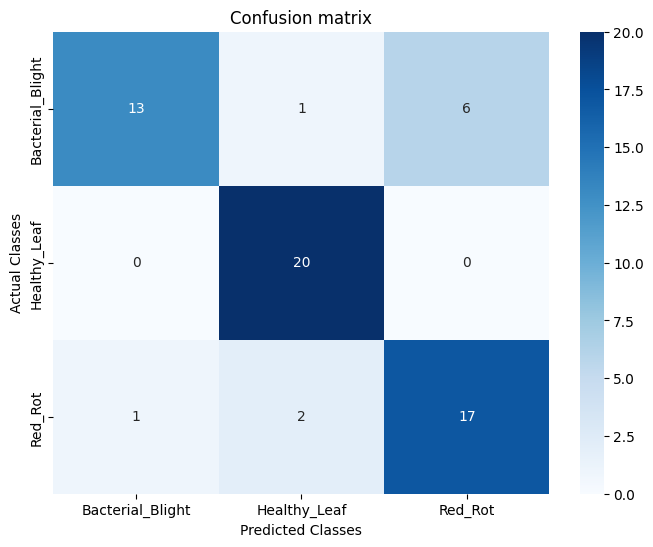


Classification Report of Inception_model:
                  precision    recall  f1-score   support

Bacterial_Blight       0.93      0.65      0.76        20
    Healthy_Leaf       0.87      1.00      0.93        20
         Red_Rot       0.74      0.85      0.79        20

        accuracy                           0.83        60
       macro avg       0.85      0.83      0.83        60
    weighted avg       0.85      0.83      0.83        60



In [232]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
prediction=Inception_model.predict(validation_generator)
predicted_classes=np.argmax(prediction,axis=1)
true_classes=validation_generator.classes
class_labels=list(validation_generator.class_indices.keys())
conf_matrix=confusion_matrix(true_classes,predicted_classes)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=class_labels,yticklabels=class_labels)
plt.title("Confusion matrix")
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()
# print(conf_matrix)
class_report=classification_report(true_classes,predicted_classes,target_names=class_labels,zero_division=1)
print("\nClassification Report of Inception_model:")
print(class_report)

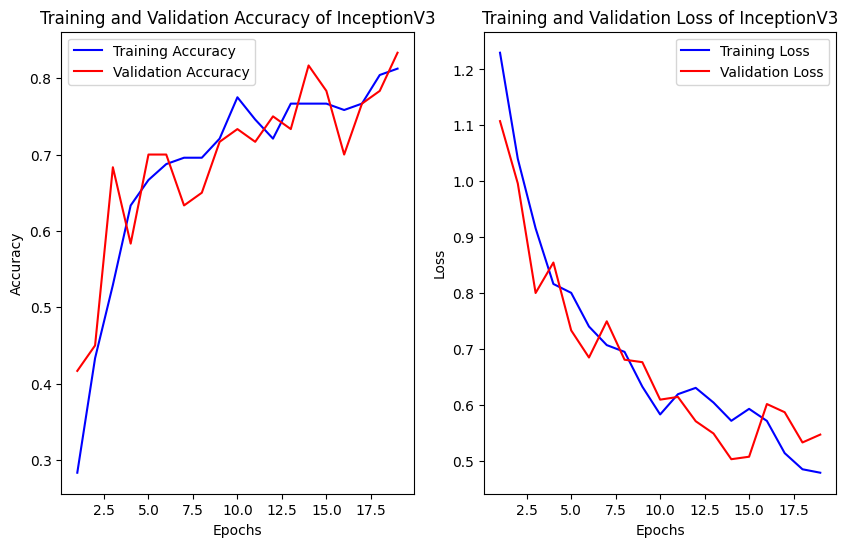

In [233]:
import matplotlib.pyplot as plt
# Get training and validation accuracy values
train_accuracy = Inception_model_history.history['accuracy']
val_accuracy = Inception_model_history.history['val_accuracy']
# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)
# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of InceptionV3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.show()


# Get training and validation loss values
train_loss = Inception_model_history.history['loss']
val_loss = Inception_model_history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss of InceptionV3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [234]:
model_version="InceptionV3"
Inception_model.save(f"./base_models/{model_version}")

INFO:tensorflow:Assets written to: ./base_models/InceptionV3\assets


INFO:tensorflow:Assets written to: ./base_models/InceptionV3\assets


In [235]:
Inception_model.save("InceptionV3.h5")

# Trained Custom CNN

In [32]:
# Create a simple CNN model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
CNN_model = Sequential() 
CNN_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))) 
# CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Conv2D(32, (3, 3), activation='relu',kernel_regularizer=l2(0.001))) 
# CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Dense(32,activation='relu',kernel_regularizer=l2(0.001))) 
# CNN_model.add(BatchNormalization())
CNN_model.add(Flatten())
# CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(3,activation="softmax")) 
CNN_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
CNN_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 dense_25 (Dense)            (None, 54, 54, 32)        1056      
                                                                 
 flatten_14 (Flatten)        (None, 93312)           

In [33]:
CNN_history = CNN_model.fit(
    train_generator,
    epochs=60,
    validation_data=validation_generator,
    batch_size=16

  
)

Epoch 1/60
15/15 [==============================] - 50s 3s/step - loss: 1.5444 - accuracy: 0.3667 - val_loss: 1.4481 - val_accuracy: 0.3333
Epoch 2/60
15/15 [==============================] - 49s 3s/step - loss: 1.1547 - accuracy: 0.4333 - val_loss: 1.0287 - val_accuracy: 0.5833
Epoch 3/60
15/15 [==============================] - 48s 3s/step - loss: 1.0616 - accuracy: 0.4792 - val_loss: 0.8783 - val_accuracy: 0.5833
Epoch 4/60
15/15 [==============================] - 48s 3s/step - loss: 1.0068 - accuracy: 0.4667 - val_loss: 0.8231 - val_accuracy: 0.5500
Epoch 5/60
15/15 [==============================] - 48s 3s/step - loss: 0.9514 - accuracy: 0.5208 - val_loss: 0.7752 - val_accuracy: 0.7333
Epoch 6/60
15/15 [==============================] - 48s 3s/step - loss: 0.8776 - accuracy: 0.6292 - val_loss: 0.6667 - val_accuracy: 0.7333
Epoch 7/60
15/15 [==============================] - 48s 3s/step - loss: 0.8298 - accuracy: 0.6458 - val_loss: 0.7204 - val_accuracy: 0.6000
Epoch 8/60
15/15 [==

In [34]:
cnn=CNN_model.evaluate(validation_generator)
cnn

4/4 [==============================] - 9s 2s/step - loss: 0.6707 - accuracy: 0.7833


[0.6707366704940796, 0.7833333611488342]

4/4 [==============================] - 9s 2s/step


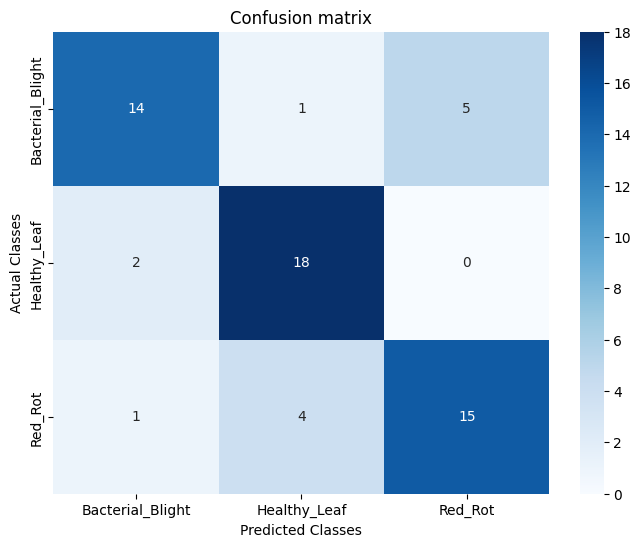


Classification Report of CNN model:
                  precision    recall  f1-score   support

Bacterial_Blight       0.82      0.70      0.76        20
    Healthy_Leaf       0.78      0.90      0.84        20
         Red_Rot       0.75      0.75      0.75        20

        accuracy                           0.78        60
       macro avg       0.79      0.78      0.78        60
    weighted avg       0.79      0.78      0.78        60



In [38]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
prediction=CNN_model.predict(validation_generator)
predicted_classes=np.argmax(prediction,axis=1)
true_classes=validation_generator.classes
class_labels=list(validation_generator.class_indices.keys())
conf_matrix=confusion_matrix(true_classes,predicted_classes)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=class_labels,yticklabels=class_labels)
plt.title("Confusion matrix")
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()
# print(conf_matrix)
class_report=classification_report(true_classes,predicted_classes,target_names=class_labels,zero_division=1)
print("\nClassification Report of CNN model:")
print(class_report)

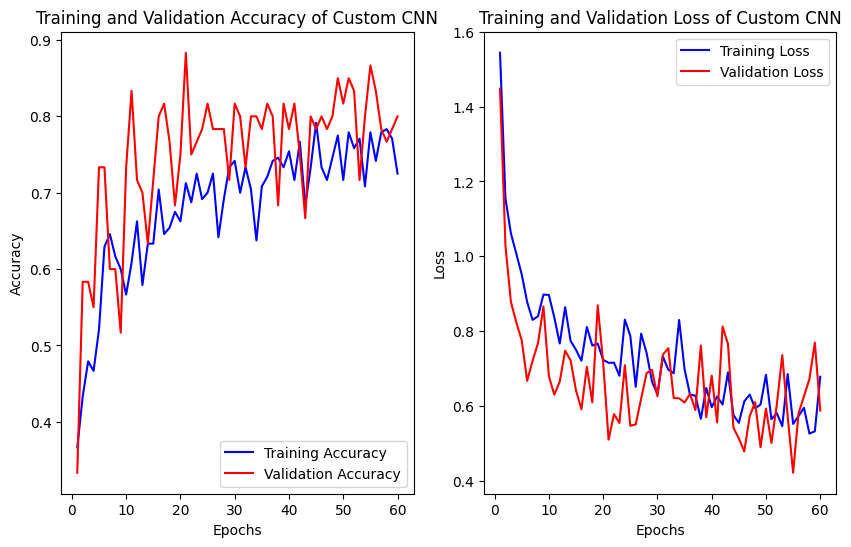

In [39]:
import matplotlib.pyplot as plt
# Get training and validation accuracy values
train_accuracy = CNN_history.history['accuracy']
val_accuracy = CNN_history.history['val_accuracy']
# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)
# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of Custom CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.show()


# Get training and validation loss values
train_loss = CNN_history.history['loss']
val_loss = CNN_history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss of Custom CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [40]:
model_version="CNN"
CNN_model.save(f"./base_models/{model_version}")

INFO:tensorflow:Assets written to: ./base_models/CNN\assets


INFO:tensorflow:Assets written to: ./base_models/CNN\assets


In [41]:
CNN_model.save("CNN.h5")

In [2]:
from tensorflow.keras.models import Model,load_model
CNN_model_load= load_model('./base_models/CNN')
CNN_model_load=Model(inputs=CNN_model_load.inputs,outputs=CNN_model_load.outputs,
                    name="Custom_CNN_Model")
DenseNet121_model_load= load_model('./base_models/DenseNet121')
DenseNet121_model_load=Model(inputs=DenseNet121_model_load.inputs,outputs=DenseNet121_model_load.outputs,
                    name="DenseNet121")
Inception_model_load= load_model('./base_models/InceptionV3')
Inception_model_load=Model(inputs=Inception_model_load.inputs,outputs=Inception_model_load.outputs,
                    name="InceptionV3")
MobileNet_model_load= load_model('./base_models/MobileNetV2')
MobileNet_model_load=Model(inputs=MobileNet_model_load.inputs,outputs=MobileNet_model_load.outputs,
                    name="MobileNetV2")

In [3]:
from tensorflow.keras.layers import Input
models=[
        CNN_model_load,
        DenseNet121_model_load,
        Inception_model_load,
        MobileNet_model_load
       ]
model_input=Input(shape=(224,224,3))
model_outputs=[model(model_input) for model in models]

In [4]:
import tensorflow as tf
class WeightedAverageLayer(tf.keras.layers.Layer):
    def __init__(self,w1,w2,w3,w4,**kwargs):
        super(WeightedAverageLayer,self).__init__(**kwargs)
        self.w1=w1
        self.w2=w2
        self.w3=w3
        self.w4=w4
     
    def call(self,inputs):
        return self.w1 * inputs[0] + self.w2 * inputs[1] + self.w3 * inputs[2] + self.w4*inputs[3]

In [5]:
ensemble_output=WeightedAverageLayer(0.15,0.45,0.25,0.15)(model_outputs)
ensemble_model= Model(inputs=model_input, outputs=ensemble_output)
ensemble_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
ensemble_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Custom_CNN_Model (Functional)  (None, 3)            291139      ['input_1[0][0]']                
                                                                                                  
 DenseNet121 (Functional)       (None, 3)            7243107     ['input_1[0][0]']                
                                                                                                  
 InceptionV3 (Functional)       (None, 3)            22065443    ['input_1[0][0]']            

In [56]:
ensemble_hist = ensemble_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    batch_size=16
                                                   
                                 )

Epoch 1/25
15/15 [==============================] - 121s 7s/step - loss: 0.2865 - accuracy: 0.8958 - val_loss: 0.3054 - val_accuracy: 0.9167
Epoch 2/25
15/15 [==============================] - 114s 8s/step - loss: 0.3296 - accuracy: 0.9000 - val_loss: 0.4312 - val_accuracy: 0.9333
Epoch 3/25
15/15 [==============================] - 99s 7s/step - loss: 0.2677 - accuracy: 0.8958 - val_loss: 0.2156 - val_accuracy: 0.9500
Epoch 4/25
15/15 [==============================] - 97s 6s/step - loss: 0.2291 - accuracy: 0.9458 - val_loss: 0.3080 - val_accuracy: 0.9167
Epoch 5/25
15/15 [==============================] - 93s 6s/step - loss: 0.2231 - accuracy: 0.9333 - val_loss: 0.4601 - val_accuracy: 0.8833
Epoch 6/25
15/15 [==============================] - 93s 6s/step - loss: 0.1936 - accuracy: 0.9708 - val_loss: 0.2589 - val_accuracy: 0.9333
Epoch 7/25
15/15 [==============================] - 94s 6s/step - loss: 0.2457 - accuracy: 0.9292 - val_loss: 0.4950 - val_accuracy: 0.8000
Epoch 8/25
15/15 [

In [57]:
ensemble_model_evaluate=ensemble_model.evaluate(validation_generator)
ensemble_model_evaluate

4/4 [==============================] - 17s 4s/step - loss: 0.2006 - accuracy: 0.9500


[0.20057792961597443, 0.949999988079071]

4/4 [==============================] - 20s 4s/step


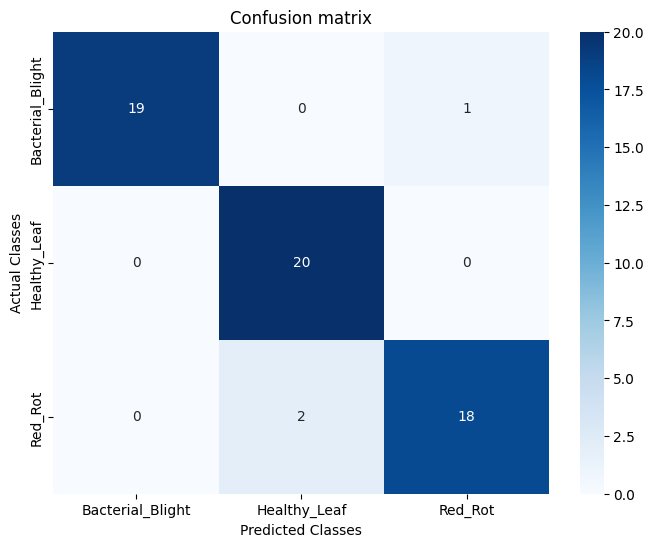


Classification Report of Ensemble Model :
                  precision    recall  f1-score   support

Bacterial_Blight       1.00      0.95      0.97        20
    Healthy_Leaf       0.91      1.00      0.95        20
         Red_Rot       0.95      0.90      0.92        20

        accuracy                           0.95        60
       macro avg       0.95      0.95      0.95        60
    weighted avg       0.95      0.95      0.95        60



In [58]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
prediction=ensemble_model.predict(validation_generator)
predicted_classes=np.argmax(prediction,axis=1)
true_classes=validation_generator.classes
class_labels=list(validation_generator.class_indices.keys())
conf_matrix=confusion_matrix(true_classes,predicted_classes)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=class_labels,yticklabels=class_labels)
plt.title("Confusion matrix")
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()
# print(conf_matrix)
class_report=classification_report(true_classes,predicted_classes,target_names=class_labels,zero_division=1)
print("\nClassification Report of Ensemble Model :")
print(class_report)

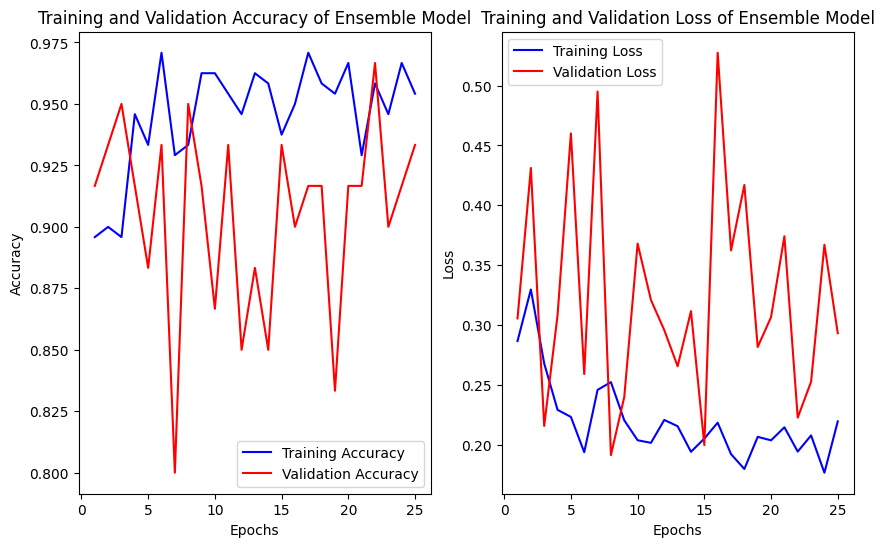

In [59]:
import matplotlib.pyplot as plt
# Get training and validation accuracy values
train_accuracy = ensemble_hist.history['accuracy']
val_accuracy = ensemble_hist.history['val_accuracy']
# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)
# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of Ensemble Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.show()


# Get training and validation loss values
train_loss = ensemble_hist.history['loss']
val_loss = ensemble_hist.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss of Ensemble Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [60]:
model_version="Ensemble_Model"
ensemble_model.save(f"./base_models/{model_version}")

INFO:tensorflow:Assets written to: ./base_models/Ensemble_Model\assets


INFO:tensorflow:Assets written to: ./base_models/Ensemble_Model\assets


In [61]:
ensemble_model.save("Ensemble_Model.h5")